## Manifold Learning on an S-curve

In [1]:
import pandas as pd
import seaborn as sns

from sklearn import datasets

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Load Data

In [14]:
def generate_s_curve(method, n = 1500):
    
    X, color = method( n_samples = n)
    
    print ("Shape of X : ", X.shape)
    print ("Shape of color : ", color.shape)
    print()
    print ("Sample X : \n")
    
    X = pd.DataFrame(X)
    print(X.sample(10))
    
    ax = plt.subplots(figsize=(12, 8))
    ax = plt.axes(projection ='3d')
    
    ax.scatter3D(X[0], X[1], X[2], c = color, cmap = plt.cm.RdYlBu, s=100);
    
    return X, color

Shape of X :  (1500, 3)
Shape of color :  (1500,)

Sample X : 

             0         1         2
1238  0.766580  1.869499 -0.357852
729   0.727136  0.046177 -1.686494
1490 -0.138899  0.828740  0.009693
306  -0.977272  1.413069  0.788013
1116  0.448432  1.521326  1.893817
735   0.571643  0.216057 -1.820503
18   -0.939339  1.586075 -1.342990
891  -0.978814  0.335714  0.795249
286  -0.940241  0.220533  1.340509
1322 -0.891708  0.431519 -1.452612


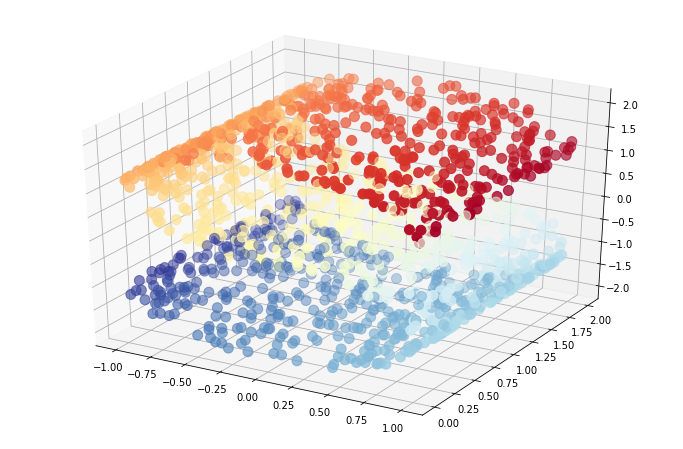

In [15]:
X, color = generate_s_curve(datasets.samples_generator.make_s_curve)

## Manifold Learning

In [25]:
def apply_manifold_learning(X, method):
    
    X = method.fit_transform(X)
    
    print ("New shape of X : ", X.shape)
    print()
    print ("Sample X : \n")
    
    X = pd.DataFrame(X)
    print(X.sample(10))
    
    plt.subplots(figsize = (12, 10))
    plt.axis('equal');

    plt.scatter(X[0], X[1], c = color, cmap = plt.cm.RdYlBu)
    plt.xlabel('X[0]')
    plt.ylabel('X[1]');
    
    return method

### Apply MDS
* n_components : Number of dimensions in which to immerse the dissimilarities.
* metric : If True, perform metric MDS; otherwise, perform nonmetric MDS.
* embedding_ :Stores the position of the dataset in the embedding space.
* stress_ : The final value of the stress (sum of squared distance of the disparities and the distances for all constrained points).

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

New shape of X :  (1500, 2)

Sample X : 

             0         1
162   0.008580  0.092909
994   0.364982  0.513665
636   0.491737  0.293395
412   0.016621 -0.412507
999  -0.393198 -0.106719
1370  0.351233 -0.244461
912  -0.556586 -0.264938
1176 -0.337534  0.472928
1040  0.280553 -0.117137
877   0.149030  0.095051


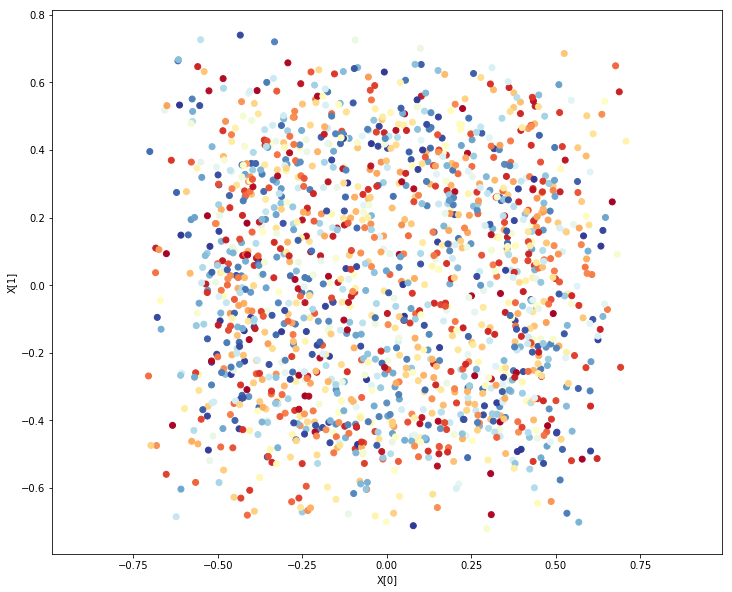

In [26]:
from sklearn.manifold import MDS

mds = apply_manifold_learning(X, MDS(n_components = 2, metric = False))

New shape of X :  (1500, 2)

Sample X : 

             0         1
1136  1.107528 -1.538504
146   1.642243 -0.965711
688  -1.829272  0.806076
413  -1.668900  1.156799
260  -1.559928 -0.591921
208   1.368450 -1.499686
936  -1.386861 -0.584681
79    0.916785 -1.534922
1123 -0.828520 -0.742948
996  -2.135082  0.410381


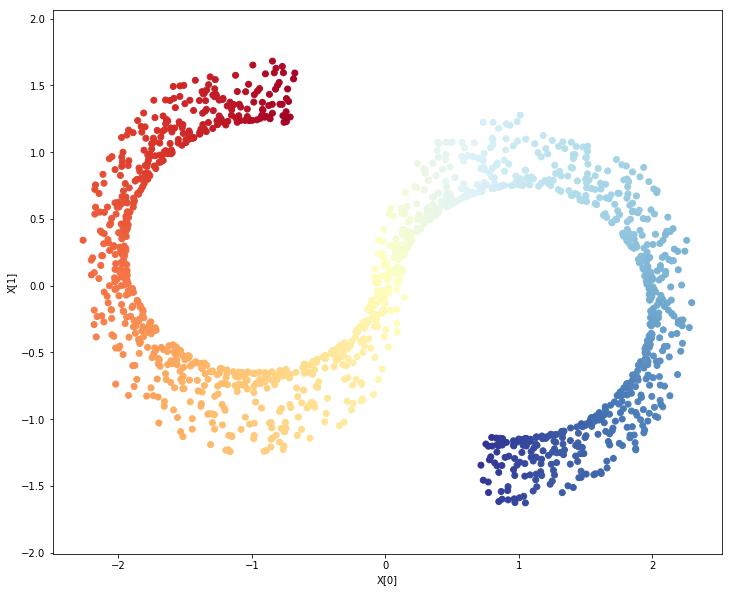

In [27]:
mds = apply_manifold_learning(X, MDS(n_components = 2, metric = True))

### Apply Spectral Embedding
* n_components : The dimension of the projected subspace. 
* random_state : A pseudo random number generator used for the initialization of the lobpcg eigenvectors.
* eigen_solver : None, ‘arpack’, ‘lobpcg’, or ‘amg’
    * The eigenvalue decomposition strategy to use.
    
* embedding_ : Spectral embedding of the training matrix.

* affinity_matrix_ : Affinity_matrix constructed from samples or precomputed.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html

New shape of X :  (1500, 2)

Sample X : 

             0         1
41    0.000596  0.002941
1305 -0.002742 -0.002677
238   0.002958 -0.002438
600  -0.002686 -0.002445
1472  0.001820  0.000827
202  -0.001876  0.000614
1066 -0.001365  0.001892
226   0.000560  0.002978
690   0.001421  0.001723
129   0.001764  0.000965


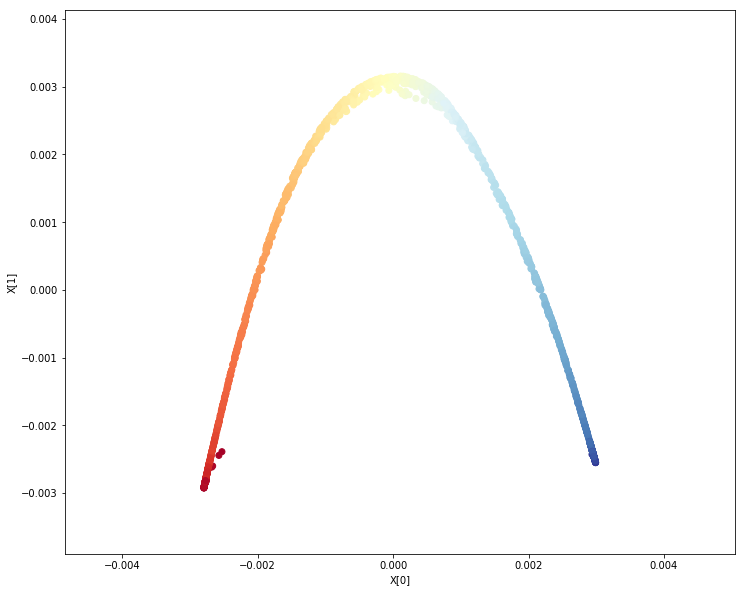

In [28]:
from sklearn.manifold import SpectralEmbedding

spectral_em = apply_manifold_learning(X, \
        SpectralEmbedding(n_components = 2, random_state = 0, eigen_solver = "arpack"))

### Apply TSNE
* n_components : Dimension of the embedded space.
* init : Initialization of embedding. Possible options are ‘random’, ‘pca’, and a numpy array of shape (n_samples, n_components). PCA initialization cannot be used with precomputed distances and is usually more globally stable than random initialization.
* random_state : If int, random_state is the seed used by the random number generator
* embedding_ : Stores the embedding vectors.
* kl_divergence_ : Kullback-Leibler divergence after optimization.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

New shape of X :  (1500, 2)

Sample X : 

              0          1
816   13.268764  -9.060290
1229  -8.921798 -13.804548
812    8.433998  -8.545915
613  -69.369545   0.979495
1066 -20.373590  -2.962797
769   56.616451  -3.615681
824   25.215242  -8.980016
1006 -74.299683   4.713568
432   67.436150   1.624319
687  -24.992357  -3.469871


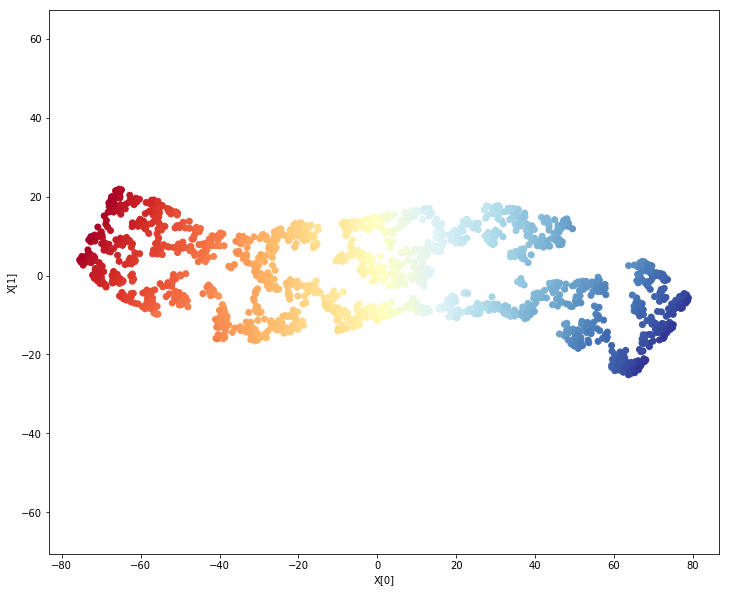

In [29]:
from sklearn.manifold import TSNE

tsne = apply_manifold_learning(X, TSNE(n_components = 2, init = 'pca', random_state = 0))

### Apply Isomap

* n_neighbors : number of neighbors to consider for each point.

* n_components : number of coordinates for the manifold
* embedding_ : Stores the embedding vectors.

* dist_matrix_ : Stores the geodesic distance matrix of training data.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html

New shape of X :  (1500, 2)

Sample X : 

             0         1
1400  3.844347  0.875803
424   2.694662 -0.677481
1054  0.300095 -0.411913
1467 -0.419951 -0.713679
1296 -0.473900 -0.583233
114  -2.727063  0.333565
184  -2.984289 -0.173326
1444  2.441552  0.444882
659  -3.607641  0.108952
764   3.251324  0.314318


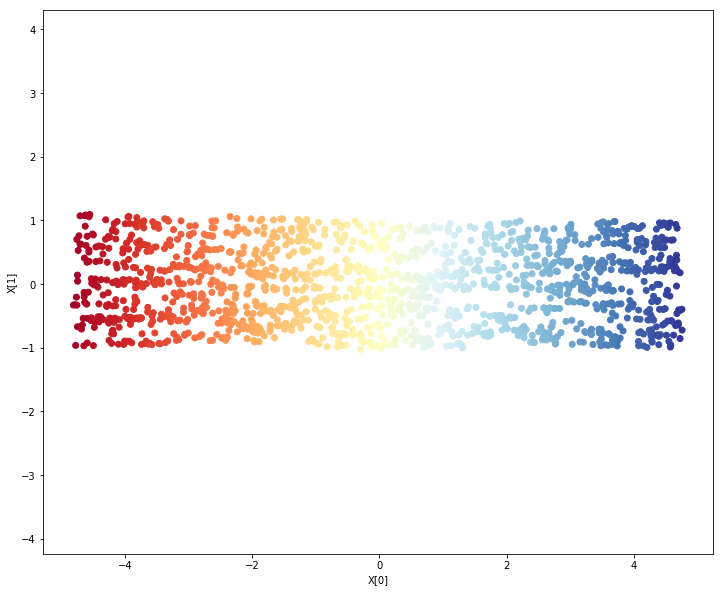

In [30]:
from sklearn.manifold import Isomap

isomap = apply_manifold_learning(X, Isomap(n_neighbors = 15, n_components = 2))

### Apply LLE
* n_neighbors :number of neighbors to consider for each point.

* n_components : number of coordinates for the manifold
* method : ‘standard’, ‘hessian’, ‘modified’ or ‘ltsa’
    * standard : use the standard locally linear embedding algorithm. 

    * hessian : use the Hessian eigenmap method. This method requires n_neighbors > n_components * (1 + (n_components + 1) / 2 

    * modified : use the modified locally linear embedding algorithm.
    * ltsa : use local tangent space alignment algorithm
* embedding_ : Stores the embedding vectors

* reconstruction_error_ : Reconstruction error associated with embedding_

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html

New shape of X :  (1500, 2)

Sample X : 

             0         1
452  -0.035554  0.048606
332  -0.015926  0.017648
1302 -0.032620  0.020082
1448 -0.005658 -0.026390
932  -0.042212  0.083604
342   0.030885 -0.011679
875  -0.034268 -0.009376
745  -0.024954 -0.005740
1182  0.044046  0.034121
6     0.016746 -0.015273


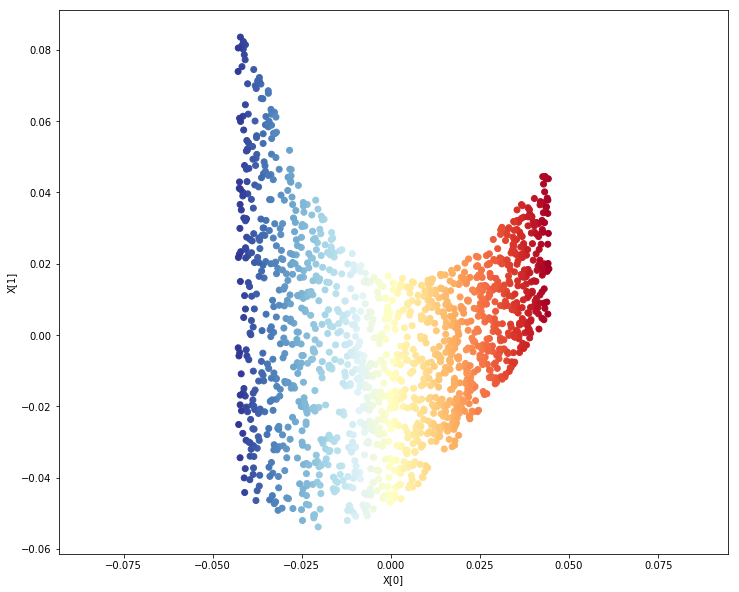

In [31]:
from sklearn.manifold import LocallyLinearEmbedding

lle = apply_manifold_learning(X, \
        LocallyLinearEmbedding(n_neighbors = 15, n_components = 2, method = 'standard') ) 

### Apply HLLE

* embedding_ : Stores the embedding vectors

* reconstruction_error_ : Reconstruction error associated with embedding_

New shape of X :  (1500, 2)

Sample X : 

             0         1
472   0.017494 -0.008689
699   0.024910  0.006652
887  -0.004209  0.002388
993   0.032739  0.031592
1086 -0.004163  0.017527
1054  0.002828  0.018164
301   0.018760  0.023638
1237  0.031376  0.026922
1167  0.009258 -0.020701
22    0.027477 -0.030635


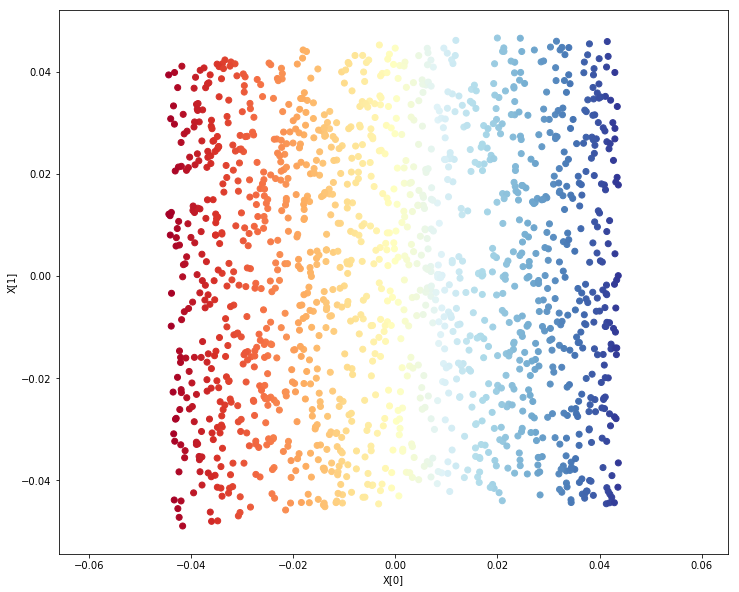

In [32]:
hlle = apply_manifold_learning(X, 
            LocallyLinearEmbedding(n_neighbors = 15, n_components = 2, method = 'hessian'))